# Chapter 3-2 Multiple Linear Regression

Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=1, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

In [2]:
# Getting the data
advertising = ML_Table.read_table("./data/Advertising.csv")
advertising = advertising.drop(0)
advertising

TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
8.6,2.1,1,4.8
199.8,2.6,21.2,10.6


## 3.2.1 Estimating the Regression Coefficients

The multiple linear regression model takes the form

$Y = β_0 + β_1X_1 +···+β_{p}X_{p} + ε$,

where $X_j$ represents the jth predictor and $β_j$ quantifies the association between that variable and the response. We interpret βj as the average effect on Y of a one unit increase in Xj, holding all other predictors fixed.

In the advertising example, this becomes
$sales=  β0 + β1×TV + β2×radio + β3×newspaper + ε$.

In [3]:
advertising.linear_regression('Sales').params

(2.9388893694594049, array([ 0.04576465,  0.18853002, -0.00103749]))

In [4]:
adver_model = advertising.linear_regression('Sales').model

In [5]:
adver_model(0,0,0)

2.9388893694594049

### Visualizing a 2D regression

In [6]:
ad2 = advertising.drop('Newspaper')
ad2.linear_regression('Sales').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,2.9211,0.29449,9.91919,[ 2.33212056 3.51007927],[ 2.03763088 3.80456895]
TV,0.0457548,0.00139036,32.9087,[ 0.0429741 0.04853553],[ 0.04158375 0.04992588]
Radio,0.187994,0.00803997,23.3824,[ 0.17191428 0.20407417],[ 0.16387431 0.21211414]


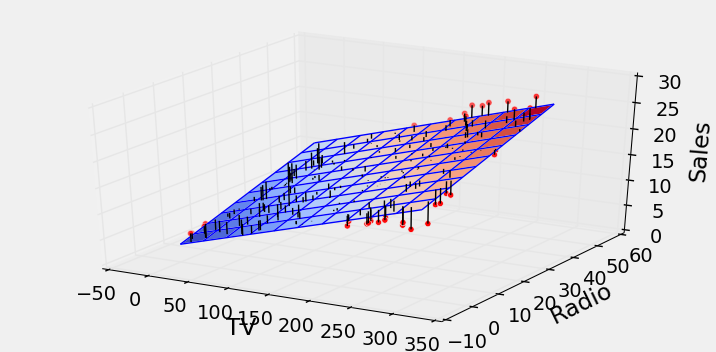

In [9]:
# Linear model with two input variables is a plane
ad2.plot_fit('Sales', ad2.linear_regression('Sales').model, width=8)

### Multiple regression inference and goodness of fit

At this point "ISL" skips over how to compute the standard error of the multiple regression parameters - relying on R to just produce the answer.  It requires some matrix notation and a numerical computation of the matrix inverse, but involves a bunch of standard terminology that is specific to the inference aspect, as opposed to the general notion in linear algebra of approximating a function over a basis.  

A nice treatment can be found at this [reference](http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat401/Notes/401-multreg.pdf)

In [10]:
# response vector
Y = advertising['Sales']
labels = [lbl for lbl in advertising.labels if lbl != 'Sales']
p = len(labels) # number of parameter
n = len(Y)  # number of observations
labels

['TV', 'Radio', 'Newspaper']

In [11]:
# Transform the table into a matrix
advertising.select(labels).rows

Rows(TV    | Radio | Newspaper
230.1 | 37.8  | 69.2
44.5  | 39.3  | 45.1
17.2  | 45.9  | 69.3
151.5 | 41.3  | 58.5
180.8 | 10.8  | 58.4
8.7   | 48.9  | 75
57.5  | 32.8  | 23.5
120.2 | 19.6  | 11.6
8.6   | 2.1   | 1
199.8 | 2.6   | 21.2
... (190 rows omitted))

In [12]:
# Design matrix
X = np.array([np.append([1], row) for row in advertising.select(labels).rows])

In [14]:
# slope vector
b0, slopes = advertising.linear_regression('Sales').params
b = np.append([b0], slopes)

In [15]:
np.shape(X), np.shape(b)

((200, 4), (4,))

In [16]:
# residual
res = np.dot(X, b) - advertising['Sales']

In [17]:
# Variance of the residual
sigma2 = sum(res**2)/(n-p-1)
sigma2

2.8409452188887094

In [18]:
Xt = np.transpose(X)

In [19]:
# The matrix that needs to be inverted is only p x p
np.dot(Xt, X)

array([[  2.00000000e+02,   2.94085000e+04,   4.65280000e+03,
          6.11080000e+03],
       [  2.94085000e+04,   5.79111839e+06,   6.98061980e+05,
          9.19625280e+05],
       [  4.65280000e+03,   6.98061980e+05,   1.52107860e+05,
          1.64946550e+05],
       [  6.11080000e+03,   9.19625280e+05,   1.64946550e+05,
          2.81096740e+05]])

In [20]:
np.shape(np.dot(Xt, X))

(4, 4)

In [21]:
# standard error matrix
SEM = sigma2*np.linalg.inv(np.dot(Xt, X))
SEM

array([[  9.72867479e-02,  -2.65727337e-04,  -1.11548946e-03,
         -5.91021239e-04],
       [ -2.65727337e-04,   1.94573710e-06,  -4.47039463e-07,
         -3.26595026e-07],
       [ -1.11548946e-03,  -4.47039463e-07,   7.41533504e-05,
         -1.78006245e-05],
       [ -5.91021239e-04,  -3.26595026e-07,  -1.78006245e-05,
          3.44687543e-05]])

In [22]:
# variance of the coefficients are the diagonal elements
variances = [SEM[i,i] for i in range(len(SEM))]
variances

[0.09728674788537045,
 1.9457371021089758e-06,
 7.4153350439614996e-05,
 3.4468754276181135e-05]

In [23]:
# standard error of the coeficients
SE = [np.sqrt(v) for v in variances]
SE

[0.31190823632179138,
 0.0013948968069749732,
 0.0086112339673019567,
 0.0058710096470863627]

In [24]:
# t-statistics
b/SE

array([  9.42228844,  32.80862443,  21.89349606,  -0.17671459])

In [25]:
advertising.linear_regression('Sales').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,2.93889,0.311908,9.42229,[ 2.3150729 3.56270584],[ 2.00316466 3.87461408]
TV,0.0457646,0.0013949,32.8086,[ 0.04297485 0.04855444],[ 0.04157996 0.04994934]
Radio,0.18853,0.00861123,21.8935,[ 0.17130755 0.20575248],[ 0.16269632 0.21436372]
Newspaper,-0.00103749,0.00587101,-0.176715,[-0.01277951 0.01070453],[-0.01865052 0.01657554]


In [26]:
advertising.RSS_model('Sales', adver_model)

556.82526290218721

In [27]:
advertising.R2_model('Sales', adver_model)

0.89721063817895219

## 3.2.2 Some Important questions

1. Is at least one of the predictors X1 , X2 , . . . , Xp useful in predicting the response?
2. Do all the predictors help to explain Y, or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict,
and how accurate is our prediction?


### Correlation matrix

Above shows that spending on newspaper appears to have no effect on sales.  The apparent effect when looking at newspaper versus sales in isolation is capturing the tendency to spend more on newspaper when spending more on radio.

In [28]:
advertising.Cor()

Param,TV,Radio,Newspaper,Sales
TV,1,0.0548087,0.0566479,0.782224
Radio,0.0548087,1,0.354104,0.576223
Newspaper,0.0566479,0.354104,1,0.228299
Sales,0.782224,0.576223,0.228299,1


### F-statistic

$F = \frac{(TSS - RSS)/p}{RSS/(n - p - 1)}$

When there is no relationship between the response and predictors, one would expect the F-statistic to take on a value close to 1. On the other hand, if Ha is true, then E{(TSS − RSS)/p} > σ2, so we expect F to be greater than 1.

In [29]:
advertising.F_model('Sales', adver_model)

570.27070365909424

In [30]:
advertising.lm_fit('Sales', adver_model)

Quantity,Value
Residual standard error,1.67698
R^2,0.897211
F-statistic,570.271


In [31]:
# Using this tool for the 1D model within the table
advertising.lm_fit('Sales', advertising.regression_1d('Sales', 'TV'), 'TV')

Quantity,Value
Residual standard error,3.25866
R^2,0.611875
F-statistic,312.145


Sometimes we want to test that a particular subset of q of the coefficients are zero. This corresponds to a null hypothesis

H0 : $β_{p−q+1} =β_{p−q+2} =...=β_{p} =0$

where for convenience we have put the variables chosen for omission at the end of the list. In this case we fit a second model that uses all the variables except those last q. Suppose that the residual sum of squares for that model is $RSS_0$. Then the appropriate F-statistic is

$F = \frac{(RSS_0 − RSS)/q}{RSS/(n−p−1)}$.

In [32]:
ad2_model = ad2.linear_regression('Sales').model
ad2.lm_fit('Sales', ad2_model)

Quantity,Value
Residual standard error,1.67711
R^2,0.897194
F-statistic,859.618


In [33]:
RSS0 = ad2.RSS_model('Sales', ad2_model)
RSS = advertising.RSS_model('Sales', adver_model)
((RSS0 - RSS)/1)/(advertising.num_rows - 3 - 1)

0.00045263859913793382

## Variable selection

* *Forward selection* - start with null model and add predictors one at a time using the variable that result in the lowest RSS
* *Backward selection* - start with all variables and iteratively remove the one with the largest P-value (smallest T-statistic)
* *Mixed selection* - add like forward but skip ones with too high a P-value


In [35]:
input_labels = [lbl for lbl in advertising.labels if lbl != 'Sales']
fwd_labels = ['Sales']
for lbl in input_labels:
    fwd = advertising.select(fwd_labels + [lbl])
    model = fwd.linear_regression('Sales').model
    print(lbl, fwd.RSS_model('Sales', model))

TV 2102.53058313
Radio 3618.47954903
Newspaper 5134.80454411
